# I'm in Group 17, our project is to analyze the data set collected from an online entertainment app called 'CleverCogs' used by BlackWood for their residences. Our goal is to find useful information from the data set and provide an informative analysis of the usage of the app, to help the stakeholders and development team to better understand their user and to make better design decisions. 

### The data holder has assigned several tasks for the project. My responsibility is to 1. Find out what is the most popular activity / 2. Try to analyz the correlation between each activity / 3. Look into the correlation between the user's characteristics and activities. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure

# Describe Data Set

#### According to the following code, we can see that this data set is tabular. It contains both numeric and textual values. The data set has 314766 rows and 8 columns. 

#### Some of the columns in the data frame are useless regarding on my tasks, so I will clean up the data set in the next step.

In [2]:
df = pd.read_csv('CC_Data_2020.csv')

In [3]:
df.head()

,Time,VisitorID,ExternalID,Users,Accommodation,LinkTitle,LinkType,ContentInfo
0,10/30/20 13:16,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Youtube Music,Internet,NaN
1,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Youtube Music,Internet,NaN
2,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,My Music,Category,NaN
3,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Entertainment,Category,NaN
4,10/30/20 13:01,679CBA7A-948B-4F2E-9432-002DDD5FFF8A,NaN,User,Broom Main Building,Forth 2,Radio,NaN


In [4]:
df.tail()

,Time,VisitorID,ExternalID,Users,Accommodation,LinkTitle,LinkType,ContentInfo
314761,10/29/18 1:27,3FBBBB99-E67F-4511-B9B1-8F402B89DBE5,5107.0,User,NaN,Red Hot Chili Peppers,Internet,NaN
314762,10/29/18 1:27,3FBBBB99-E67F-4511-B9B1-8F402B89DBE5,5107.0,User,NaN,My Music,Category,NaN
314763,10/29/18 1:27,3FBBBB99-E67F-4511-B9B1-8F402B89DBE5,5107.0,User,NaN,Entertainment,Category,NaN
314764,10/29/18 0:59,7B0FC8AD-6EF6-4760-A236-DB0BF969EED7,8639.0,User,Night Support Service,My Music,Category,NaN
314765,10/29/18 0:58,7B0FC8AD-6EF6-4760-A236-DB0BF969EED7,8639.0,User,Night Support Service,Entertainment,Category,NaN


In [5]:
df.columns

Index(['Time', 'VisitorID', 'ExternalID', 'Users', 'Accommodation',
       'LinkTitle', 'LinkType', 'ContentInfo'],
      dtype='object')

In [6]:
df.shape

(314766, 8)

In [7]:
df['LinkTitle'].nunique()

1395

# Data Cleaning

#### According to the previous code, we can have a general understanding of the data. I can use the Time column to count the Times the use access to a certain activity, use the ExternalID column to identify the unique users, LinkTitle to sort the most popular activity, and use the LinkType to see the activity type. So other than these four columns, I've dropped all other useless values.

In [8]:
CC_data = df.drop(columns=['VisitorID', 'Users', 'Accommodation', 'ContentInfo'])
CC_data

,Time,ExternalID,LinkTitle,LinkType
0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,10/30/20 13:14,8846.0,My Music,Category
3,10/30/20 13:14,8846.0,Entertainment,Category
4,10/30/20 13:01,NaN,Forth 2,Radio
...,...,...,...,...
314761,10/29/18 1:27,5107.0,Red Hot Chili Peppers,Internet
314762,10/29/18 1:27,5107.0,My Music,Category
314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,10/29/18 0:59,8639.0,My Music,Category


In [9]:
# For Task 1
CC_data1 = df.drop(columns=['VisitorID', 'Users', 'Accommodation', 'ContentInfo']).applymap(str)
CC_data1

,Time,ExternalID,LinkTitle,LinkType
0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,10/30/20 13:14,8846.0,My Music,Category
3,10/30/20 13:14,8846.0,Entertainment,Category
4,10/30/20 13:01,nan,Forth 2,Radio
...,...,...,...,...
314761,10/29/18 1:27,5107.0,Red Hot Chili Peppers,Internet
314762,10/29/18 1:27,5107.0,My Music,Category
314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,10/29/18 0:59,8639.0,My Music,Category


# Task 1: Most popular avtivities

    According to the first section of the data, the LinkType column mainly consists of Internet and Category, so I assume that this entertainment app has two main categories, which are built-in activities and online activity. Then according to the count of the unique value, there is 1395 different activity, I believe that it is not necessary to count all the value into analysis since you can't control what people viewing online.  

    So, I decided to find out what are the top 20 most popular activities in general, top 10 for built-in activity, and top 10 internet activity. I believe this could help the development or design team to better understand the user's interest, to make better design decisions maybe such as adding new features to the built-in activity that previously not in the app.

### Top 20 Activities in General

In [10]:
top20_general = CC_data.LinkTitle.value_counts()[:20]
print(top20_general)

Entertainment          43117
My Interests           17196
YouTube                16378
Google                 15373
My Music               14975
Play Games             12760
Card Matching Games    12433
Single Player Games     9720
Videos                  9384
Patience                7655
Information             7228
Online TV               6728
Youtube Music           6359
Radio Stations          5696
Youtube                 4708
BBC Football            4215
Family & Friends        3780
Celtic FC               3408
Solitaire               3375
Smooth Radio            2798
Name: LinkTitle, dtype: int64


### Top 10 Built-in Activities

In [11]:
bi = CC_data1[CC_data1.LinkType.str.contains('Category')]
top10_bi = bi.groupby(['LinkTitle']).count().sort_values(by='Time', ascending=False).head(10)
top10_bi

,Time,ExternalID,LinkType
LinkTitle,,,
Entertainment,43117,43117,43117
My Interests,17196,17196,17196
My Music,14975,14975,14975
Play Games,12760,12760,12760
Single Player Games,9720,9720,9720
Videos,9384,9384,9384
Information,7228,7228,7228
Online TV,6728,6728,6728
Radio Stations,5696,5696,5696


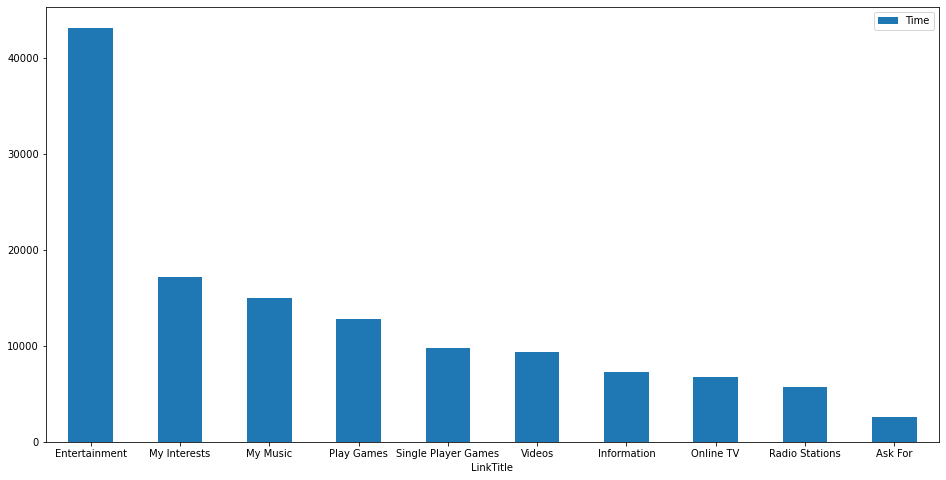

In [12]:
top10_reset1 = top10_bi.reset_index()
ax = top10_reset1.plot.bar(x='LinkTitle', y='Time', rot=0, figsize=(16,8))

### Top 10 Internet Activities

In [13]:
internet = CC_data1[CC_data1.LinkType.str.contains('Internet')]
top10_internet = internet.groupby(['LinkTitle']).count().sort_values(by='Time', ascending=False).head(10)
top10_internet

,Time,ExternalID,LinkType
LinkTitle,,,
YouTube,16378,16378,16378
Google,15373,15373,15373
Card Matching Games,12433,12433,12433
Youtube Music,6359,6359,6359
Youtube,4708,4708,4708
BBC Football,4215,4215,4215
Family & Friends,3780,3780,3780
Celtic FC,3408,3408,3408
Solitaire,3375,3375,3375


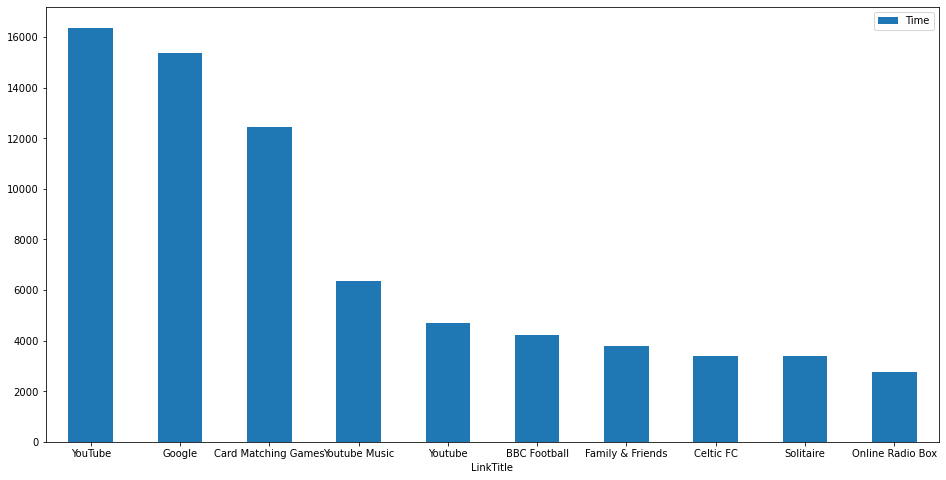

In [14]:
top10_reset2 = top10_internet.reset_index()
ax = top10_reset2.plot.bar(x='LinkTitle', y='Time', rot=0, figsize=(16,8))

### According to the above two tables, we can see that the top three activities access through the internet has basically the same access time compare to the top 2-4 activities in the built-in function. So I think something the development team could consider about, based on this data is that maybe add these three activities into the app as a built-in function, so the user can have easier access to these functions.

# Task 2: Correlation between activities

    Since there are more than a thousand different activities in the LinkTitle column, so it's not possible to analyze all of them, so I think it makes more sense to analyze the correlation between the top 20 most popular activities.

### Create a dataframe for top 20 activities and learn more info about the data

In [15]:
CC_data = CC_data[CC_data.LinkTitle.isin(top20_general.index.to_list())]

In [16]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207286 entries, 0 to 314765
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        207286 non-null  object 
 1   ExternalID  148894 non-null  float64
 2   LinkTitle   207286 non-null  object 
 3   LinkType    207286 non-null  object 
dtypes: float64(1), object(3)
memory usage: 7.9+ MB


### More cleaning

In [17]:
CC_data.dropna(subset=['ExternalID'],inplace=True)

<ipython-input-17-36694822986b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CC_data.dropna(subset=['ExternalID'],inplace=True)


### Convert data to correct format inorder to analysis

In [18]:
CC_data.Time = pd.to_datetime(CC_data.Time)
CC_data.ExternalID = CC_data.ExternalID.astype(int)

/Users/jiawenli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
#I learned this from my friend, but didn't fully understnad the logic behand this
Data_OneHot = pd.get_dummies(CC_data[['LinkTitle','LinkType']])
CC_data = pd.concat([CC_data[['Time', 'ExternalID']],Data_OneHot],axis=1)

### Calculate the correlation between each activity

In [20]:
Link_Title = ['LinkTitle_BBC Football', 'LinkTitle_Card Matching Games','LinkTitle_Celtic FC', 'LinkTitle_Entertainment','LinkTitle_Family & Friends', 'LinkTitle_Google','LinkTitle_Information', 'LinkTitle_My Interests', 'LinkTitle_My Music','LinkTitle_Online TV', 'LinkTitle_Patience', 'LinkTitle_Play Games','LinkTitle_Radio Stations', 'LinkTitle_Single Player Games', 'LinkTitle_Smooth Radio', 'LinkTitle_Solitaire', 'LinkTitle_Videos','LinkTitle_YouTube', 'LinkTitle_Youtube', 'LinkTitle_Youtube Music']

Link_Title_table = []
for i in Link_Title:
    Link_list = []
    for j in Link_Title:
        Link_list.append(CC_data[i].corr(CC_data[j]))
    Link_Title_table.append(Link_list)
#print(Link_Title_table)

### Create a dataframe for above value and drew heatmap to visualize the data

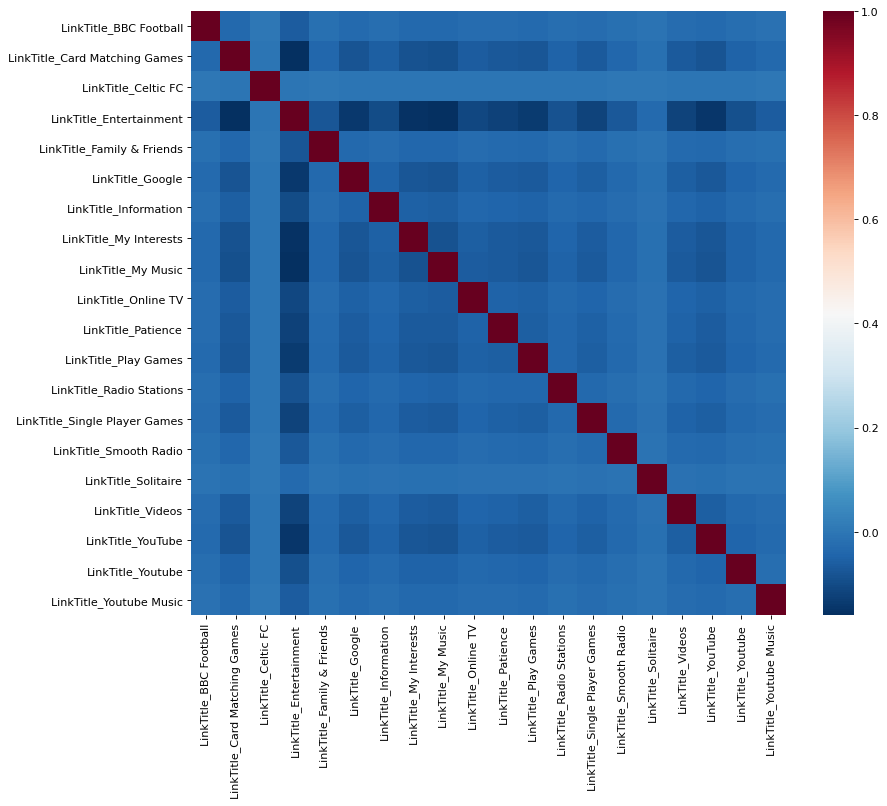

In [21]:
data_frame_title = pd.DataFrame(Link_Title_table)


data_frame_title.index = Link_Title
data_frame_title.columns = Link_Title

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data_frame_title,cmap="RdBu_r")

### Based on the heatmap, we can see the relationship between each top20 popular activity. Besides the red box, the lighter the blue the tighter the activities are correlated. For example, the correlation between BBC Football and Celtic FC is high, but it's lower with Entertainment. So I think some of this information could be useful for the future improvement of the app, for example, if people who watching football in the app, the app could auto-suggest the information about Celtic FC, but for people who use more entertainment function, it might be better to recommend more function such as music, games or online video.

# Tasks 3: Correlation between user's characteristics and activities.

    For task 3, there is two CSV file, so I need to merge the tow file to further processes the data, but before that, I'll do the same processes as above to get top 20 activities for the following analysis.

In [22]:
CC_data = pd.read_csv('CC_Data_2020.csv')

In [23]:
top10_general = CC_data.LinkTitle.value_counts()[:10]
CC_data = CC_data[CC_data.LinkTitle.isin(top10_general.index.to_list())]

### Import file 2, merge the data on sharing column, then learn more information about whole data set for cleaning processes

In [24]:
Customer_data = pd.read_csv('CustomerDataAnon.csv')
Customer_CC_data = pd.merge(CC_data,Customer_data,on='ExternalID',how='left')

In [25]:
Customer_CC_data.head()

,Time,VisitorID,ExternalID,Users,Accommodation,LinkTitle,LinkType,ContentInfo,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,My Music,Category,NaN,F,1/3/77,43.0,NaN,Mental Health Issues
1,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Entertainment,Category,NaN,F,1/3/77,43.0,NaN,Mental Health Issues
2,10/30/20 12:57,F95E5F2A-F8A6-4E37-8BF7-3C63F2469C36,7933.0,User,Menzieshill,My Music,Category,NaN,F,3/23/31,89.0,NaN,NaN
3,10/30/20 12:48,F95E5F2A-F8A6-4E37-8BF7-3C63F2469C36,7933.0,User,Menzieshill,Videos,Category,NaN,F,3/23/31,89.0,NaN,NaN
4,10/30/20 12:47,F95E5F2A-F8A6-4E37-8BF7-3C63F2469C36,7933.0,User,Menzieshill,Entertainment,Category,NaN,F,3/23/31,89.0,NaN,NaN


In [26]:
Customer_CC_data.tail()

,Time,VisitorID,ExternalID,Users,Accommodation,LinkTitle,LinkType,ContentInfo,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
163384,10/29/18 2:49,73F6E172-0004-4234-A6C1-DF3997353451,5385.0,User,Broom Main Building,My Interests,Category,NaN,M,9/1/52,68.0,NaN,Brain Injury
163385,10/29/18 1:27,3FBBBB99-E67F-4511-B9B1-8F402B89DBE5,5107.0,User,NaN,My Music,Category,NaN,NaN,NaN,NaN,NaN,NaN
163386,10/29/18 1:27,3FBBBB99-E67F-4511-B9B1-8F402B89DBE5,5107.0,User,NaN,Entertainment,Category,NaN,NaN,NaN,NaN,NaN,NaN
163387,10/29/18 0:59,7B0FC8AD-6EF6-4760-A236-DB0BF969EED7,8639.0,User,Night Support Service,My Music,Category,NaN,M,8/22/55,65.0,NaN,Mental Health Issues
163388,10/29/18 0:58,7B0FC8AD-6EF6-4760-A236-DB0BF969EED7,8639.0,User,Night Support Service,Entertainment,Category,NaN,M,8/22/55,65.0,NaN,Mental Health Issues


In [27]:
Customer_CC_data.columns

Index(['Time', 'VisitorID', 'ExternalID', 'Users', 'Accommodation',
       'LinkTitle', 'LinkType', 'ContentInfo', 'Gender', 'DateOfBirth', 'Age',
       'StaffPlanConditions', 'CareSysCondition'],
      dtype='object')

In [28]:
Customer_CC_data['Gender'].unique()

array(['F', nan, 'M', 'U'], dtype=object)

In [29]:
Customer_CC_data['LinkTitle'].nunique()

10

### Data Cleaning

    Based on the above info, we can see the there are unknown values in the Gender column and several useless columns for this task. So in this step, I cleaned up all the incorrect values and useless columns. After that, converted the Age column into 'int' in order to use plot graph

In [30]:
Customer_CC_data.dropna(subset=['Gender'],inplace=True)
Customer_CC_data[~Customer_CC_data.Gender.str.contains("U")]
Customer_CC_data['Age'] = Customer_CC_data.Age.astype(int)
clean_data = Customer_CC_data.drop(columns=['VisitorID', 'Users', 'Accommodation', 'ContentInfo',
                            'DateOfBirth', 'StaffPlanConditions'])

### Check new data

In [31]:
clean_data

,Time,ExternalID,LinkTitle,LinkType,Gender,Age,CareSysCondition
0,10/30/20 13:14,8846.0,My Music,Category,F,43,Mental Health Issues
1,10/30/20 13:14,8846.0,Entertainment,Category,F,43,Mental Health Issues
2,10/30/20 12:57,7933.0,My Music,Category,F,89,NaN
3,10/30/20 12:48,7933.0,Videos,Category,F,89,NaN
4,10/30/20 12:47,7933.0,Entertainment,Category,F,89,NaN
...,...,...,...,...,...,...,...
163382,10/29/18 6:18,5347.0,Entertainment,Category,M,52,Cerebral Palsy
163383,10/29/18 3:23,5977.0,Patience,HTML page,M,52,Multiple Sclerosis
163384,10/29/18 2:49,5385.0,My Interests,Category,M,68,Brain Injury
163387,10/29/18 0:59,8639.0,My Music,Category,M,65,Mental Health Issues


In [32]:
clean_data['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

### Relationship between age and top 10 activities

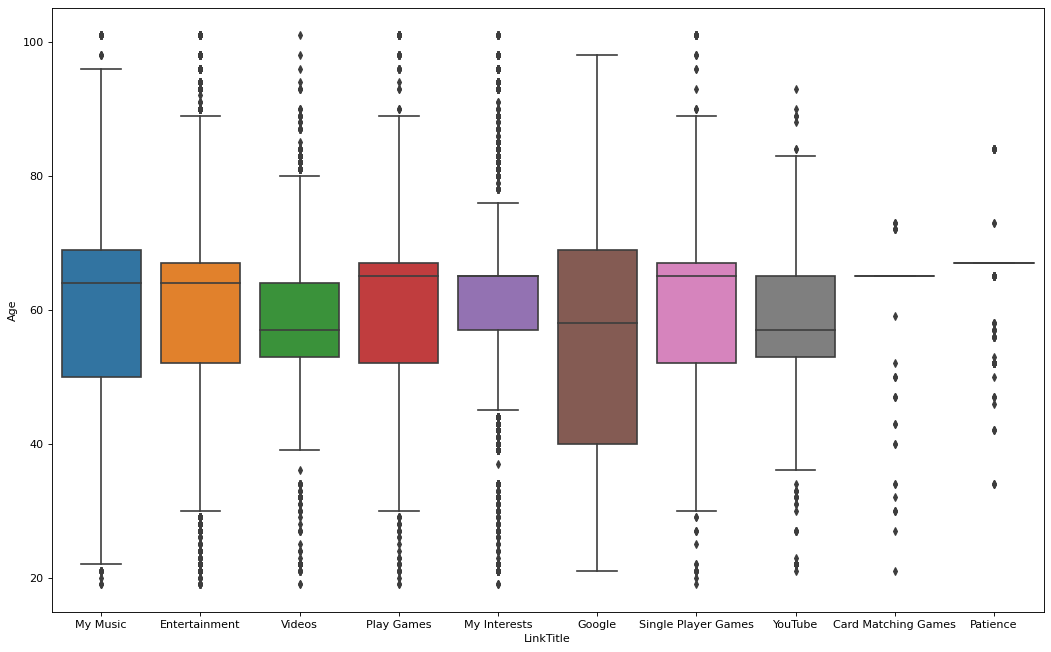

In [33]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='LinkTitle',y='Age',data=Customer_CC_data)

### Based on this boxplot, the activity 'My music & Google' cover a huge age range, activity such as 'Entertainment, Play Games & Single Player Games' cover a medium range of ages, and the age range for other activities are even smaller. I believe this information could potentially help the app development team to prioritize different activities according to different age group

### Relationship between gender and top 10 activities

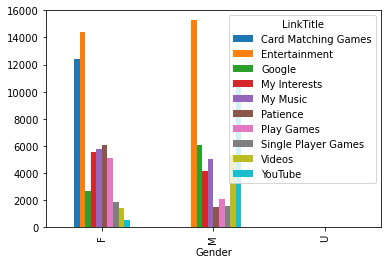

In [34]:
pd.crosstab(clean_data.Gender,clean_data.LinkTitle).plot(kind='bar')

### Based on this bar chart, the female residences have a higher use frequences of 'Patience' function than male residences, and male use 'Video' and Youtube much more than female.

### Relationship between disability and top 10 activities

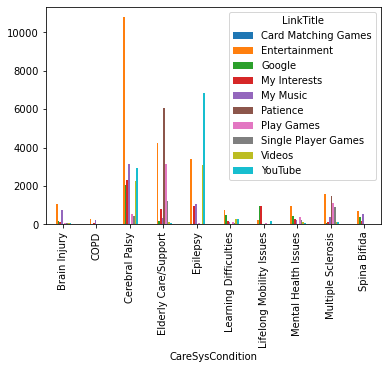

In [35]:
most_10_CareSysCondition = Customer_CC_data.CareSysCondition.value_counts()[:10]
Customer_CC_data = Customer_CC_data[Customer_CC_data.CareSysCondition.isin(most_10_CareSysCondition.index.to_list())]
pd.crosstab(Customer_CC_data.CareSysCondition,Customer_CC_data.LinkTitle).plot(kind='bar')

# Reflection & Hypothesise

### Above analysis result and charts has provided some basic understanding of the data. I have given some detailed hypothesizes and suggestions under each data frame and graphs created above. 

### In order to verify the above suggestion and hypothesize, I think the best practice is to put it in use in the real world, for example, add an autosuggestion feature into the app to help the user find the functions they might be interested in, such as people use the app built-in video function might also interested watching some Youtube video based on the analysis above. 

### In summary, most of the analysis is focused on the correlation between activities and several different factors. I think this basic analysis can provide some useful information to help the stakeholders to better understand their user and to further improve their app

 ## Jiawen Li / Group 17 / Assignment 2